### 유의 사항/ 할일
- 상관계수 구할 때 일단 최소한의 데이터 개수가 있는 업종들을 대상으로 돌려보기 (30개?) -> 이후에 무성님이 가져온 2년치 데이터로 다시 업종별 데이터 개수 분포 확인 
- 상관계수 해석에 유의: 상관계수가 높은 업종들의 시각화 plot 그려보기
가능하면 모든 업종의 산점도(지역별 소득 ~ 업종 매출) 다 그려보기
  - 상관계수가 낮다고 해서 두 변수 간에 관계가 없다고 말할 수 없음 (nonlinear한 관계를 보일 수 있음)
  - 상관계수가 높다고 해서 반드시 두 변수가 linear한 관계가 아닐 수도 있음(outlier의 영향으로 상관계수가 높게 나온 경우도 존재)
    - 이러한 것을 그래프로 확인한 후에 outlier 제거 방식도 결정
- 업종 코드 엑셀 파일 추가로 무성님이 올려주신 파일 참고해서 업종 코드 - 업종 소분류 매핑
- 회귀분석에서 배운 거 활용해서 업종별로 나누어서 지역별 소득을 독립변인, 매출을 종속변인으로 하여 회귀분석 돌려보기!(수업 내용 복습겸) 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
# 21년 9월 기준 지역별(구별) 개인소득금액 평균 데이터
dist_income = pd.read_csv('/content/drive/MyDrive/CCP 공모전/데이터/서울시 구별 개인소득 평균.csv') 

In [4]:
dist_income

,구,sum,count,mean
0,강남구,140573664,32790,4287.089478
1,강동구,106863159,29218,3657.442638
2,강북구,49761587,15258,3261.344016
3,강서구,130645342,37006,3530.382695
4,관악구,117263670,36695,3195.630740
5,광진구,66497242,19434,3421.696100
6,구로구,102672112,28380,3617.762932
7,금천구,47263359,14226,3322.322438
8,노원구,125558869,35046,3582.687582
9,도봉구,67124237,18838,3563.235853


In [8]:
# 최근 2년치 지역별(구별) 업종별 매출금액
dist_sales = pd.read_excel('/content/drive/MyDrive/CCP 공모전/데이터/11월 22일_2.xlsx')
dist_sales = dist_sales.iloc[:, 2:]
dist_sales

,ccg_nm,svc_scls_tpbuz_nm,매출금액 합계,매출건수 합계,평균가맹점,가맹점 수 평균
0,강남구,BAR,17676072177,103208,3.500,113.500
1,강남구,PC방,3949856970,786651,5.125,133.625
2,강남구,가구,95538430352,148129,4.500,410.500
3,강남구,가스,106237568,862,2.500,8.250
4,강남구,갈비/삼겹살/구이,110887096740,2239218,5.250,670.625
...,...,...,...,...,...,...
2997,중랑구,화랑/표구/염료,530924977,4762,2.500,26.750
2998,중랑구,화장품,9655899900,233621,5.500,452.500
2999,중랑구,횟집,14559245103,361722,4.000,207.750
3000,중랑구,휘트니스센터,4927763936,40838,3.125,87.375


In [13]:
dist_sales = dist_sales.rename(columns = {'svc_scls_tpbuz_nm':'업종코드'})

In [14]:
dist_sales.sort_values(by=['업종코드'])

,ccg_nm,업종코드,매출금액 합계,매출건수 합계,평균가맹점,가맹점 수 평균
0,강남구,BAR,17676072177,103208,3.500,113.5000
2161,양천구,BAR,272075224,6483,3.250,36.2500
842,금천구,BAR,247604316,4730,2.750,26.5000
2041,송파구,BAR,1888341079,24061,3.250,48.1250
1441,마포구,BAR,4033815952,156939,4.000,93.5000
...,...,...,...,...,...,...
721,광진구,휴대폰,1837361790,23212,8.875,265.8750
2881,중구,휴대폰,6418794324,105924,4.250,94.0625
841,구로구,휴대폰,2347922501,15346,5.250,262.0000
2402,영등포구,휴대폰,2213635626,26899,4.125,287.8750


In [15]:
dist_sales[dist_sales['업종코드']=='BAR']

,ccg_nm,업종코드,매출금액 합계,매출건수 합계,평균가맹점,가맹점 수 평균
0,강남구,BAR,17676072177,103208,3.500000,113.500000
121,강동구,BAR,303252518,5554,3.750000,23.500000
241,강북구,BAR,467364497,9396,2.750000,19.375000
360,강서구,BAR,1525571582,18230,3.000000,32.500000
482,관악구,BAR,1292605051,32434,4.625000,46.000000
602,광진구,BAR,561074997,8097,3.250000,29.500000
722,구로구,BAR,591939571,7435,3.250000,37.500000
842,금천구,BAR,247604316,4730,2.750000,26.500000
961,노원구,BAR,886027158,10139,4.125000,15.500000
1081,도봉구,BAR,119623071,1718,2.600000,11.800000


- 궁금한 점
 - 평균가맹점 컬럼: 
  - grouped_nw_tp_amtmean = rows_df.groupby(['ccg_nm','svc_scls_tpbuz_nm'])['avg_mer_num'].agg(**{'평균가맹점':'mean'}).reset_index()  
 - 가맹점 수 평균 컬럼: 
grouped_nw_tp_amtsum2 = rows_df.groupby(['ccg_nm','svc_scls_tpbuz_nm'])['mer_num'].agg(**{'가맹점 수 평균':'mean'}).reset_index()
 - 해당 기간의 구별 업종별 총 가맹점 수의 합 또는 평균으로 구하는 게 더 좋지 않나? 

- dist_sale 데이터프레임에 {nw_zp_3:지역별개인소득금액 median}으로 이루어진 딕셔너리 활용해서 각각의 row마다 지역별 소득금액 median 매핑하기 -> 컬럼 추가
- 업종별로 9월 평균 매출금액과 개인 소득금액 median 컬럼의 상관관계 구하기
- 상관관계 높은 업종 찾기  

In [16]:
dist_income

,구,sum,count,mean
0,강남구,140573664,32790,4287.089478
1,강동구,106863159,29218,3657.442638
2,강북구,49761587,15258,3261.344016
3,강서구,130645342,37006,3530.382695
4,관악구,117263670,36695,3195.630740
5,광진구,66497242,19434,3421.696100
6,구로구,102672112,28380,3617.762932
7,금천구,47263359,14226,3322.322438
8,노원구,125558869,35046,3582.687582
9,도봉구,67124237,18838,3563.235853


In [17]:
dist_income_mapping = dict(zip(dist_income['구'], dist_income['mean']))
dist_income_mapping

{'강남구': 4287.089478499543,
 '강동구': 3657.4426380998016,
 '강북구': 3261.344016253769,
 '강서구': 3530.3826946981567,
 '관악구': 3195.630739882818,
 '광진구': 3421.6960996192242,
 '구로구': 3617.762931642001,
 '금천구': 3322.3224377899624,
 '노원구': 3582.68758203504,
 '도봉구': 3563.2358530629576,
 '동대문구': 3586.9113493454283,
 '동작구': 3571.574413629765,
 '마포구': 3808.9095571555376,
 '서대문구': 3561.1108382107027,
 '서초구': 4497.042080848244,
 '성동구': 3704.182729446386,
 '성북구': 3535.755186442957,
 '송파구': 3835.692052456944,
 '양천구': 3779.4977257525093,
 '영등포구': 3874.1287888531624,
 '용산구': 4135.673294629898,
 '은평구': 3530.401820504631,
 '종로구': 3850.3628211991445,
 '중구': 3786.4044916686794,
 '중랑구': 3355.730507120365}

In [18]:
dist_sales['income_mean'] = dist_sales['ccg_nm'].apply(lambda x: dist_income_mapping[x])
dist_sales

,ccg_nm,업종코드,매출금액 합계,매출건수 합계,평균가맹점,가맹점 수 평균,income_mean
0,강남구,BAR,17676072177,103208,3.500,113.500,4287.089478
1,강남구,PC방,3949856970,786651,5.125,133.625,4287.089478
2,강남구,가구,95538430352,148129,4.500,410.500,4287.089478
3,강남구,가스,106237568,862,2.500,8.250,4287.089478
4,강남구,갈비/삼겹살/구이,110887096740,2239218,5.250,670.625,4287.089478
...,...,...,...,...,...,...,...
2997,중랑구,화랑/표구/염료,530924977,4762,2.500,26.750,3355.730507
2998,중랑구,화장품,9655899900,233621,5.500,452.500,3355.730507
2999,중랑구,횟집,14559245103,361722,4.000,207.750,3355.730507
3000,중랑구,휘트니스센터,4927763936,40838,3.125,87.375,3355.730507


### 데이터 업종코드 개수 및 분포 확인

In [19]:
# 전체 업종 개수
dist_sales['업종코드'].nunique()

122

In [21]:
indus_type_cnt = dist_sales.groupby(['업종코드'])['업종코드'].count()
indus_type_cnt

업종코드
BAR          25
PC방          25
가구           25
가스           24
갈비/삼겹살/구이    25
             ..
화랑/표구/염료     25
화장품          25
횟집           25
휘트니스센터       25
휴대폰          25
Name: 업종코드, Length: 122, dtype: int64

In [22]:
import matplotlib.pyplot as plt

(array([  1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0., 120.]),
 array([ 2. ,  4.3,  6.6,  8.9, 11.2, 13.5, 15.8, 18.1, 20.4, 22.7, 25. ]),
 <a list of 10 Patch objects>)

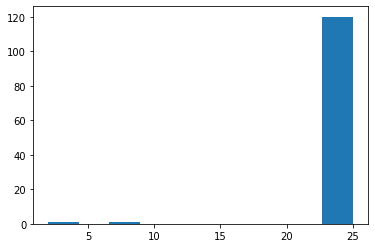

In [23]:
plt.hist(indus_type_cnt)

In [24]:
max(indus_type_cnt)

25

In [25]:
indus_type_cnt[indus_type_cnt<25]

업종코드
가스       24
고시원      24
관광       24
산후조리원    24
요양원      23
중고차       8
철물/자재    23
캠핑/펜션     2
Name: 업종코드, dtype: int64

- 데이터 개수가 상대적으로 많이 적은 업종은 제거해야 할 듯 (상관관계 파악 불가)
  - 중고차, 캠핑/펜션 제거
- 최소한 데이터가 몇 개 이상 존재하는 업종에 대해서 상관관계 분석해야 할 듯 (threshold 기준을 몇 개로?)

In [26]:
len(indus_type_cnt[indus_type_cnt>=20])  # 데이터가 20개 이상 존재하는 업종 개수 

120

In [27]:
indus_type_20 = indus_type_cnt[indus_type_cnt>=20].index

In [28]:
indus_type_20 = list(indus_type_20)

### 상관분석

In [29]:
# 데이터가 5개 이상인 업종코드의 데이터만 추출
dist_sales = dist_sales[dist_sales['업종코드'].apply(lambda x: x in indus_type_20)]

In [30]:
dist_sales

,ccg_nm,업종코드,매출금액 합계,매출건수 합계,평균가맹점,가맹점 수 평균,income_mean
0,강남구,BAR,17676072177,103208,3.500,113.500,4287.089478
1,강남구,PC방,3949856970,786651,5.125,133.625,4287.089478
2,강남구,가구,95538430352,148129,4.500,410.500,4287.089478
3,강남구,가스,106237568,862,2.500,8.250,4287.089478
4,강남구,갈비/삼겹살/구이,110887096740,2239218,5.250,670.625,4287.089478
...,...,...,...,...,...,...,...
2997,중랑구,화랑/표구/염료,530924977,4762,2.500,26.750,3355.730507
2998,중랑구,화장품,9655899900,233621,5.500,452.500,3355.730507
2999,중랑구,횟집,14559245103,361722,4.000,207.750,3355.730507
3000,중랑구,휘트니스센터,4927763936,40838,3.125,87.375,3355.730507


In [33]:
np.corrcoef(dist_sales['매출금액 합계'], dist_sales['income_mean'])[0,1]

0.05454924458310443

In [34]:
# 업종코드별로 2년동안(2020~2021)의 매출금액 합계와 지역별 소득 평균의 상관계수
cor_indus_type = dist_sales.groupby(dist_sales['업종코드']).apply(lambda x: np.corrcoef(x['매출금액 합계'], x['income_mean'])[0,1])
cor_indus_type

업종코드
BAR          0.544310
PC방         -0.080133
가구           0.517442
가스           0.139140
갈비/삼겹살/구이    0.431517
               ...   
화랑/표구/염료     0.336044
화장품          0.513570
횟집           0.542779
휘트니스센터       0.663928
휴대폰          0.460672
Length: 120, dtype: float64

In [35]:
cor_indus_type.sort_values()

업종코드
요양원        -0.324545
여성의류       -0.296536
서점         -0.231496
고시원        -0.102673
식료품        -0.102594
              ...   
반찬가게        0.669469
한의원         0.673056
초밥/전통일식     0.673075
경양식/레스토랑    0.741535
꽃/나무        0.741728
Length: 120, dtype: float64

(array([ 3.,  0.,  7.,  1.,  9., 16., 17., 30., 26., 11.]),
 array([-0.32454463, -0.21791734, -0.11129005, -0.00466276,  0.10196454,
         0.20859183,  0.31521912,  0.42184641,  0.5284737 ,  0.63510099,
         0.74172828]),
 <a list of 10 Patch objects>)

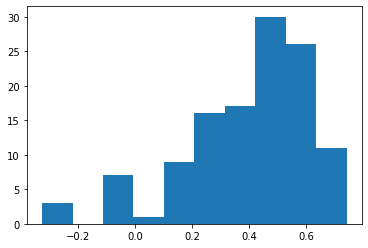

In [36]:
import matplotlib.pyplot as plt
plt.hist(cor_indus_type)

In [47]:
df_cor_indus_type = pd.DataFrame(cor_indus_type_high, columns=['상관계수'])
df_cor_indus_type = df_cor_indus_type.sort_values(by='상관계수', ascending=False).reset_index()
df_cor_indus_type

,업종코드,상관계수
0,꽃/나무,0.741728
1,경양식/레스토랑,0.741535
2,초밥/전통일식,0.673075
3,한의원,0.673056
4,반찬가게,0.669469
5,휘트니스센터,0.663928
6,일반교습학원,0.648345
7,피부관리,0.648322
8,백반/한정식,0.647969
9,어학원,0.644078


In [49]:
# 상관계수가 0.5 이상이거나, 음수(음의 상관)인 업종코드 
df_cor_indus_type[(df_cor_indus_type['상관계수'] > 0.5) | (df_cor_indus_type['상관계수'] < 0)]

,업종코드,상관계수
0,꽃/나무,0.741728
1,경양식/레스토랑,0.741535
2,초밥/전통일식,0.673075
3,한의원,0.673056
4,반찬가게,0.669469
5,휘트니스센터,0.663928
6,일반교습학원,0.648345
7,피부관리,0.648322
8,백반/한정식,0.647969
9,어학원,0.644078


In [50]:
df_cor_indus_type.to_csv('/content/drive/MyDrive/CCP 공모전/데이터/업종별_상관관계분석_서울_2년치.csv')